In [1]:
import statistics
import random
import numpy as np
import pandas as pd
import scipy as sp
import plotly.express as xp

# <font color = 'red'>Chapter 2: Discrete Random Variables </font>

> **A random variable is a numerical quantity that is generated by a random experiment.**
A random variable is called discrete if it has either a finite or a countable number of possible values. A random variable is called continuous if its possible values contain a whole interval of numbers.

**Upper case letters such as X or Y denote a random variable. Lower case letters like x or y denote the value of a random
variable.**

## 2.1 PDF

A discrete probability distribution function has two characteristics:
1. Each probability is between zero and one, inclusive.
$$0\leq P(x)\leq 1 \nonumber$$
2. The sum of the probabilities is one.
$$\sum P(x)=1 \nonumber$$

## 2.2 The Mean and Standard Deviation of a Discrete Random Variable

### 2.2.1 Mean ($\mu$)

The mean (also called the "expectation value" or "expected value") of a discrete random variable  $X$ is the number
$$\mu =E(X)=\sum x P(x) $$
The mean of a random variable may be interpreted as the average of the values assumed by the random variable in repeated trials of the experiment.

### 2.2.2 Variance ($\sigma^2$)

The variance ( σ2 ) of a discrete random variable $X$ is the number
$$\sigma ^2=\sum (x-\mu )^2P(x) \label{var1}$$
Or
$$\sigma ^2=\left [ \sum x^2 P(x)\right ]-\mu ^2 \label{var2}$$

### 2.2.3 Standard deviation ($\sigma$)

The standard deviation, $\sigma$ , of a discrete random variable $X$ is the square root of its variance, hence is given by the formulas

$$\sigma =\sqrt{\sum (x-\mu )^2P(x)}=\sqrt{\left [ \sum x^2 P(x)\right ]-\mu ^2} \label{std}$$

In [2]:
def roll():
    return np.random.choice([1,2,3,4,5,6])

In [3]:
results = [roll() for _ in range(10)]

In [4]:
results

[2, 4, 4, 3, 5, 5, 3, 2, 2, 3]

In [5]:
prob = []

for i in [1,2,3,4,5,6]:
    probability = results.count(i) / len(results)
    prob.append(probability)

In [6]:
prob

[0.0, 0.3, 0.3, 0.2, 0.2, 0.0]

In [7]:
mean = 0

for i,j in zip(range(1,7),prob):
    mean += (i*j)

In [8]:
mean

3.3

In [9]:
var = 0

for i,j in zip([1,2,3,4,5,6],prob):
    var += ((i - mean)**2 * j)

In [10]:
var

1.21

In [11]:
std = np.sqrt(var)

In [12]:
std

1.1

## 2.3 The Binomial Distribution $\left( X \sim B(n,p) \right)$

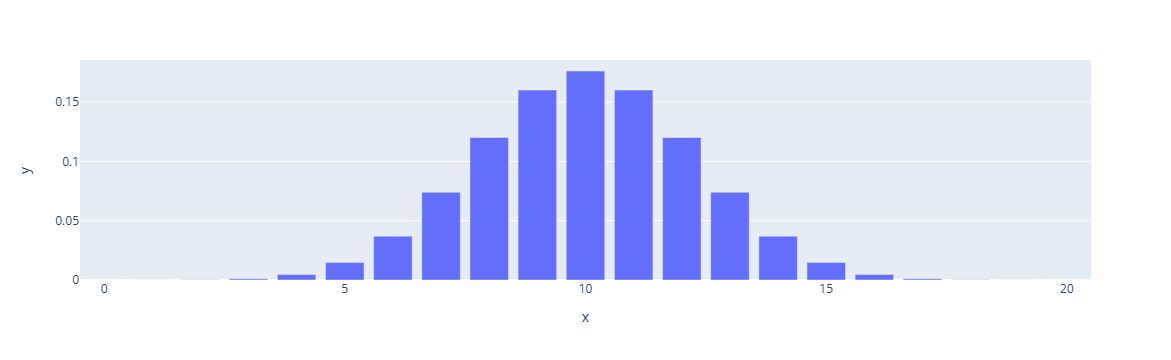

In [17]:
n = 20
p = 0.5

r_values = list(range(n + 1))

dist = [sp.stats.binom.pmf(r, n, p) for r in r_values ]

xp.bar(x = r_values, y = dist)

Suppose a random experiment has the following characteristics.

* There are n identical and independent trials of a common procedure.
* There are exactly two possible outcomes for each trial, one termed “success” and the other “failure.”
* The probability of success on any one trial is the same number  p.

Then the discrete random variable  X that counts the number of successes in the n trials is the binomial random variable with parameters  n and  p. We also say that  X has a binomial distribution with parameters  n and  p.

### 2.3.1 Probability Formula for a Binomial Random Variable

If  $X$ is a binomial random variable with parameters  n and  p, then
$$P(x)=\dfrac{n!}{x!(n−x)!}p^x(1-p)^{n−x} \nonumber$$

* The random variable X is binomial with parameters  $n=5$ and $p=0.17$, $q=1−p=0.83$.The possible values of  $X$ are $0,1,2,3,4,$ and $5$
 .
$$\begin{array}{c|cccccc} x& 0& 1& 2& 3& 4& 5\\ \hline P(x)& 0.3939& 0.4034& 0.1652& 0.0338& 0.0035& 0.0001 \\ \end{array} \nonumber$$

In [18]:
def binomial(n,x,p):
    return (np.math.factorial(n)/(np.math.factorial(x)*(np.math.factorial(n-x))))*(p**x)*((1-p)**(n-x))

In [19]:
p = []

for x in range(0,6):
    p.append(binomial(5,x,0.17))

In [20]:
p

[0.3939040642999999,
 0.4033957285,
 0.165246443,
 0.033845657,
 0.003466121500000001,
 0.00014198570000000004]

In [21]:
x = [x for x in range(0,6)]

In [22]:
sp.stats.binom.pmf(x,5,0.17)

array([3.93904064e-01, 4.03395729e-01, 1.65246443e-01, 3.38456570e-02,
       3.46612150e-03, 1.41985700e-04])

### 2.3.2 The Mean, Variance and Standard Deviation of a Binomial Random Variable

If  $X$ is a binomial random variable with parameters  $n$ and  $p$, then

$$\mu=np \nonumber$$
$$\sigma ^2=npq \nonumber$$
$$\sigma =\sqrt{npq} \nonumber$$


In [23]:
sp.stats.binom.stats(5,0.17)

(0.8500000000000001, 0.7055)

### 2.3.3 The Cumulative Probability Distribution of a Binomial Random Variable

The cumulative probability distribution of a binomial random variable is a function that gives the probability that the value of the random variable is less than or equal to a certain number, say k. The cumulative probability distribution function can be used to find probabilities for a binomial random variable. The formula for the cumulative probability distribution function of a binomial random variable is:

$$P(X≤x) = P(0) + P(1) + \ldots + P(x) \nonumber$$

$$P(X≥x)=1−P(X≤x−1) \nonumber$$

$$P(x)=P(X≤x)−P(X≤x−1) \nonumber$$



In [24]:
n = 10
p = 0.5
x = 6

In [26]:
##when P(X<=6)

sp.stats.binom.cdf(6, n, p)

0.828125

In [27]:
## when P(6)

sp.stats.binom.cdf(6, n, p) - sp.stats.binom.cdf(5, n, p)

0.205078125

In [28]:
## when P(X>=6)

1 - sp.stats.binom.cdf(5, n, p)

0.376953125

## 2.4 Geometric Distribution $\left( X \sim G ( p ) \right)$

The geometric distribution is a discrete probability distribution that describes the chances of achieving success in a series of independent trials, each having two possible outcomes. The geometric distribution thus helps measure the probability of success after a given number of trials.

* The formula for the probability mass function (PMF) of a geometric distribution is:

$$P(X = k) = p(1 - p)^{(k - 1)}$$

where $X$ is the number of trials needed to achieve the first success, $p$ is the probability of success in any given trial, and $k$ is the number of trials needed to achieve the first success. 

* The cumulative distribution function (CDF) of a geometric distribution is:

$$P(X <= k) = 1 - (1 - p)^k$$

where $X$ is the number of trials needed to achieve the first success, $p$ is the probability of success in any given trial, and $k$ is the number of trials needed to achieve the first success.

There are three main characteristics of a geometric experiment.
1. There are one or more Bernoulli trials with all failures except the last one, which is a success.
2.  In theory, the number of trials could go on forever. There must be at least one trial.
3. The probability, $p$, of a success and the probability, $q$, of a failure is the same for each trial. $p + q = 1$ and $q = 1 − p$.

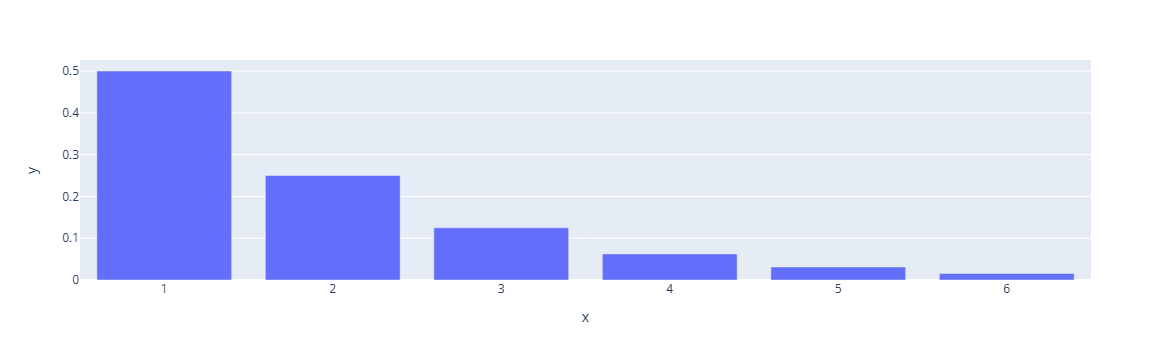

In [35]:
p = 0.5

x = np.arange(sp.stats.geom.ppf(0.01, p), sp.stats.geom.ppf(0.99, p))

xp.bar(x = x, y =  sp.stats.geom.pmf(x, p))


The mean and variance of a geometric distribution can be calculated using the following formulas:

- Mean: $E(X) = \frac{1}{p}$
- Variance: $Var(X) = \frac{(1 - p)}{p^2}$

where X is the number of trials needed to achieve the first success, and p is the probability of success in any given trial.

In [36]:
p = 0.02

mean, var = sp.stats.geom.stats(p, moments='mv')

print("Mean: ", mean)
print("Variance: ", var)

Mean:  50.0
Variance:  2450.0


## 2.5 Hyper-Geometric Distribution $\left( X \sim H(r, b, n) \right)$

There are five characteristics of a hypergeometric experiment.

1. You take samples from two groups.
2. You are concerned with a group of interest, called the first group.
3. You sample without replacement from the combined groups.
4. Each pick is not independent, since sampling is without replacement. 
5. You are not dealing with Bernoulli Trials.

A random variable $X$ follows the hypergeometric distribution if its probability mass function (pmf) is given by:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/928a49d5765a69e6abd87020769049318264c06a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.338ex; margin-left: -0.089ex; width:34.104ex; height:7.843ex;" alt="{\displaystyle p_{X}(k)=\Pr(X=k)={\frac {{\binom {K}{k}}{\binom {N-K}{n-k}}}{\binom {N}{n}}},}">



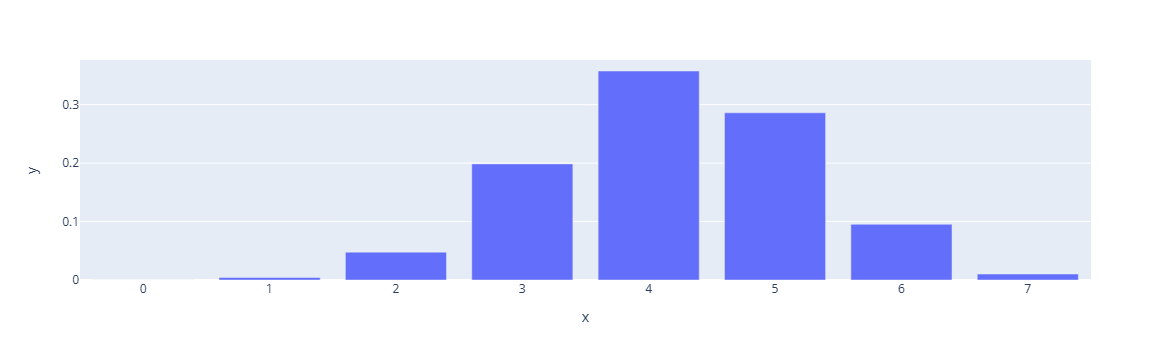

In [38]:
M = 20
n = 7
N = 12

x = np.arange(0, n+1)
pmf_dogs = sp.stats.hypergeom.pmf(x, M, n, N)

xp.bar(x = x, y = pmf_dogs)

## 2.6 Poisson Distribution $\left( X \sim P(\lambda) \right)$

A discrete random variable (RV) that counts the number of times a certain event will occur in a specific interval; characteristics of the variable:
* The probability that the event occurs in a given interval is the same for all intervals.
* The events occur with a known mean and independently of the time since the last event.

The distribution is defined by the mean μ of the event in the interval.

The probability mass function of the Poisson distribution is:

$P(X = k) = \dfrac{e^{-\lambda} \lambda^k}{k!}$

Where:

* X is a random variable following a Poisson distribution
* k is the number of times an event occurs
* P(X = k) is the probability that an event will occur k times
* e is Euler’s constant (approximately 2.718)
* $\lambda$ is the average number of times an event occurs
* ! is the factorial function

In [67]:
x = sp.stats.poisson.rvs(mu=3, size=1000)

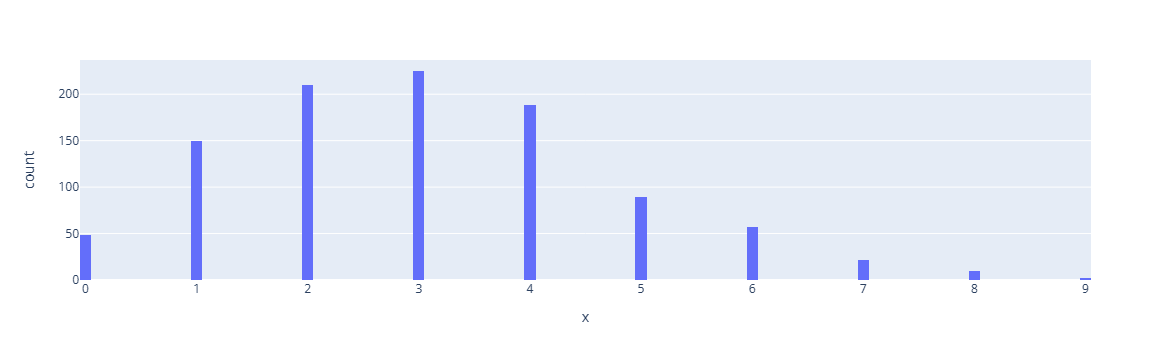

In [69]:
xp.histogram(x = x, nbins = 100)

The mean is μ = np. The standard deviation is σ = µ . 

In [72]:
# when P(X=3)

sp.stats.poisson.pmf(k=7, mu=3)

0.02160403145248382

In [73]:
# when P(X < 3)

sp.stats.poisson.cdf(k = 7, mu =3)

0.9880954961436426

In [74]:
#when P(X>3)

1 - sp.stats.poisson.cdf(k = 7, mu =3)

0.01190450385635744